# Parametric Scenario Generation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntSlider
from ipywidgets import SelectionSlider
import random

## Use the sliders to select the parameters of the model

In [ ]:
N_slider = IntSlider(min=1, max=30, description='N', value = 10)
M_slider = IntSlider(min=1, max=30, description='M', value = 10)
fire_slider = IntSlider(min=1, max=20, description='fire', value = 5)
first_responder_slider = IntSlider(min=1, max=20, description='first responders', value = 5)
survivors_slider = IntSlider(min=1, max=20, description='civilians', value = 5)
victims_slider = IntSlider(min=1, max=20, description='victims', value = 5)
exit_slider = SelectionSlider(
    options=[1, 2, 4],
    description='exit',
    value=2
)
drones_slider = SelectionSlider(
    options=[1, 2, 4],
    description='drones',
    value=1  # Default value
)

# Display the sliders.
display(N_slider, M_slider, fire_slider, first_responder_slider, victims_slider, survivors_slider, drones_slider, exit_slider)

def update_N(change):
  global N
  N = change.new
def update_M(change):
  global M
  M = change.new
def update_fire(change):
  global fire
  fire = change.new
def update_first_responder(change):
  global first_responder
  first_responder = change.new

def update_survivors(change):
  global survivors
  survivors = change.new

def update_victims(change):
  global victims
  victims = change.new

def update_drones(change):
  global drones
  drones = change.new

def update_visibilities(change):
  global visibilities
  if drones == 1:
    visibilities = [visibility_sliders[0].value]
  elif drones == 2:
    visibilities = [visibility_sliders[0].value, visibility_sliders[1].value]
  else:
    visibilities = [visibility_sliders[0].value, visibility_sliders[1].value, visibility_sliders[2].value, visibility_sliders[3].value]

def update_exit(change):
  global exit
  exit = change.new

N = N_slider.value
M = M_slider.value
fire = fire_slider.value
first_responder = first_responder_slider.value
survivors = survivors_slider.value
victims = victims_slider.value
drones = drones_slider.value
exit = exit_slider.value

N_slider.observe(update_N, names='value')
M_slider.observe(update_M, names='value')
fire_slider.observe(update_fire, names='value')
first_responder_slider.observe(update_first_responder, names='value')
survivors_slider.observe(update_survivors, names='value')
victims_slider.observe(update_victims, names='value')
drones_slider.observe(update_drones, names='value')
exit_slider.observe(update_exit, names='value')

IntSlider(value=10, description='N', max=30, min=1)

IntSlider(value=10, description='M', max=30, min=1)

IntSlider(value=5, description='fire', max=20, min=1)

IntSlider(value=5, description='first responders', max=20, min=1)

IntSlider(value=5, description='victims', max=20, min=1)

IntSlider(value=5, description='civilians', max=20, min=1)

SelectionSlider(description='drones', options=(1, 2, 4), value=1)

SelectionSlider(description='exit', index=1, options=(1, 2, 4), value=2)

In [ ]:
visibility_sliders = []
visibilities = []
for i in range(drones):
  visibility_sliders.append(IntSlider(min=1, max=5, description='visibility '+str(i), value = 2))
  visibilities.append(visibility_sliders[i].value)
  visibility_sliders[i].observe(update_visibilities, names='value')

display(*visibility_sliders)

IntSlider(value=2, description='visibility 0', max=5, min=1)

⚠ If the number of sliders do not correspond with the number of drones re run te cell above

## Generate the model

### Plase the drones

In [ ]:
drones_positions = []

x_half = N//2
y_half = M//2

bounds = []

if drones == 1:
  vis = visibilities[0]
  bounds.append((vis,vis, N-1-vis, M-1-vis))

if drones == 2:
  vis1 = visibilities[0]
  vis2 = visibilities[1]
  bounds.append((vis1, vis1,        N-1-vis1, y_half-vis1))
  bounds.append((vis2, y_half+vis2, N-1-vis2, M-1-vis2))

if drones == 4:
  vis1 = visibilities[0]
  vis2 = visibilities[1]
  vis3 = visibilities[2]
  vis4 = visibilities[3]
  bounds.append((vis1,        vis1,        x_half-vis1, y_half-vis1))
  bounds.append((vis2,        y_half+vis2, x_half-vis2, M-1-vis2))
  bounds.append((x_half+vis3, vis3,        N-1-vis3,    y_half-vis3))
  bounds.append((x_half+vis4, y_half+vis4, N-1-vis4,    M-1-vis4))

for b in bounds:
  drones_positions.append((b[0], b[1]))

visibilities, bounds, drones_positions

([2], [(2, 2, 7, 7)], [(2, 2)])

### Create room with fire and exits

In [ ]:
fire_map = np.zeros((N, M)) #reset map

def random_position():
  row = np.random.randint(0, N)
  col = np.random.randint(0, M)
  return row, col

def neighbors(x, y):
  neigh_x = np.clip([x-1, x, x+1], 0, N-1)
  neigh_y = np.clip([y-1, y, y+1], 0, M-1)
  neigh_coords = [(x_, y_) for x_ in neigh_x for y_ in neigh_y if (x_, y_) != (x,y)]

  return neigh_coords

def exit_near(x,y):
  return any([fire_map[x_, y_] == exit_code for (x_,y_) in neighbors(x, y)])

def manhattan_neighbors(x,y):
  neigh_x = np.clip([x-1, x+1], 0, N-1)
  neigh_y = np.clip([y-1, y+1], 0, M-1)
  neigh_coords = [(neigh_x[0],y), (neigh_x[1],y), (x,neigh_y[0]), (x,neigh_y[1])]
  return neigh_coords

def fire_near(x,y):
  return any([fire_map[x_, y_] == fire_code for (x_,y_) in manhattan_neighbors(x, y)])

first_responder_code = -2
civilian_code = -1
fire_code = 1
exit_code = 2

# put fire and exit

if exit == 1:
  fire_map[fire_map.shape[0]//2, 0] = exit_code
  fire_map[fire_map.shape[0]//2+1, 0] = exit_code
if exit == 2:
  fire_map[fire_map.shape[0]//2, 0] = exit_code
  fire_map[fire_map.shape[0]//2+1, 0] = exit_code
  fire_map[fire_map.shape[0]//2, -1] = exit_code
  fire_map[fire_map.shape[0]//2+1, -1] = exit_code

if exit == 4:
  fire_map[fire_map.shape[0]//2, 0] = exit_code
  fire_map[fire_map.shape[0]//2+1, 0] = exit_code
  fire_map[fire_map.shape[0]//2, -1] = exit_code
  fire_map[fire_map.shape[0]//2+1, -1] = exit_code
  fire_map[0,fire_map.shape[1]//2] = exit_code
  fire_map[0,fire_map.shape[1]//2+1] = exit_code
  fire_map[-1,fire_map.shape[1]//2] = exit_code
  fire_map[-1,fire_map.shape[1]//2+1] = exit_code

# put fire
for i in range(fire):
  x,y = random_position()
  while fire_map[x,y] != 0 or exit_near(x,y):
    x,y = random_position()
  fire_map[x,y] = fire_code
  for x_, y_ in neighbors(x, y):
    if random.random() < 0.8 and fire_map[x_, y_] == 0 and not exit_near(x_,y_):
      fire_map[x_, y_] = fire_code

### Place entities

In [ ]:
victims_positions = []
survivors_positions = []
first_responder_positions = []

fire_map[(fire_map != fire_code) & (fire_map != exit_code)] = 0

#put survivors
for i in range(survivors):
  x,y = random_position()
  while fire_map[x,y] != 0 or fire_near(x,y):
    x,y = random_position()
  fire_map[x,y] = civilian_code
  survivors_positions.append((x,y))

#put victims
for i in range(victims):
  x,y = random_position()
  while fire_map[x,y] != 0 or not fire_near(x,y):
    x,y = random_position()
  fire_map[x,y] = civilian_code
  victims_positions.append((x,y))

#put 1st responders
for i in range(first_responder):
  x,y = random_position()
  while fire_map[x,y] != 0:
    x,y = random_position()
  fire_map[x,y] = first_responder_code
  first_responder_positions.append((x,y))

## Plot the map

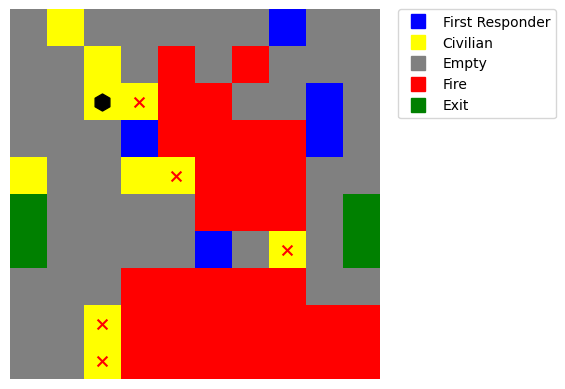

In [ ]:
from matplotlib.colors import ListedColormap

# Define a colormap
my_cmap = ListedColormap(['blue', 'yellow','gray','red','green'])

# Plot the colormap
import matplotlib.pyplot as plt
labels = ['First Responder', 'Civilian', 'Empty', 'Fire', 'Exit']

# Create a patch (proxy artist) for every color
patches = [ plt.plot([],[], marker="s", ms=10, ls="", mec=None, color=my_cmap(i),
            label="{:s}".format(labels[i]) )[0]  for i in range(len(labels)) ]


plt.imshow(fire_map, cmap=my_cmap)
if drones >= 2:
  plt.axvline(x = M//2-0.5, color = 'black', linestyle='dotted')
if drones >= 4:
  plt.axhline(y = N//2-0.5, color = 'black', linestyle='dotted')
plt.scatter([pos[1] for pos in drones_positions], [pos[0] for pos in drones_positions], c='black', marker='h', s=150, label = "drone")
plt.scatter([pos[1] for pos in victims_positions], [pos[0] for pos in victims_positions], c='red', marker='x', s=50, label = "victim")
plt.axis("off")


# Put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.show()

## Generate File

In [ ]:
def matrix_to_C(matrix, filename):
  with open(filename, 'w') as f:
    f.write('/*#################### Declaration ####################\nTHIS PORTION IS AUTOGENERATED */\n\n')
    f.write(f"""const int N = {N};   // map rows
const int M = {M};   // map columns
typedef int[0,N] coordx_t;
typedef int[0,M] coordy_t;

// Entity amounts
const int SURVIVORS_QTY = {survivors};
const int VICTIMS_QTY = {victims};
const int FIRST_RESPONDERS_QTY = {first_responder};
const int DRONES_QTY = {drones};
int[0,{max(survivors, victims, first_responder, drones)}] entities[4] = """ + """{SURVIVORS_QTY, VICTIMS_QTY, FIRST_RESPONDERS_QTY, DRONES_QTY};

// IDs
typedef int[0,SURVIVORS_QTY-1] id_s_t;
typedef int[0,VICTIMS_QTY-1] id_v_t;
typedef int[0,FIRST_RESPONDERS_QTY-1] id_f_t;
typedef int[0,DRONES_QTY-1] id_d_t;

// Busy statuses
bool survivors_busy[SURVIVORS_QTY];
bool victims_busy[VICTIMS_QTY];
bool responders_busy[FIRST_RESPONDERS_QTY];

typedef struct {
    coordx_t x;
    coordy_t y;
} pos_t;
const pos_t pos_out_of_map = {N,M};

typedef struct {
    coordx_t min_x;
    coordy_t min_y;
    coordx_t max_x;
    coordy_t max_y;
} bounds_t;""")
    f.write("// Positions for survivors, victims and first responders\n")
    f.write("pos_t survivors[SURVIVORS_QTY] = {")
    for pos in survivors_positions[0:-1]:
      f.write("{"+str(pos[0])+","+str(pos[1])+"}, ")
    f.write("{"+str(survivors_positions[-1][0])+","+str(survivors_positions[-1][1])+"}};\n")

    f.write("pos_t victims[VICTIMS_QTY] = {")
    for pos in victims_positions[0:-1]:
      f.write("{"+str(pos[0])+","+str(pos[1])+"}, ")
    f.write("{"+str(victims_positions[-1][0])+","+str(victims_positions[-1][1])+"}};\n")

    f.write("pos_t responders[FIRST_RESPONDERS_QTY] = {")
    for pos in first_responder_positions[0:-1]:
      f.write("{"+str(pos[0])+","+str(pos[1])+"}, ")
    f.write("{"+str(first_responder_positions[-1][0])+","+str(first_responder_positions[-1][1])+"}};\n\n")

    f.write("// Positions and area bounds for drones\n")
    f.write("pos_t drones[DRONES_QTY] = {")
    for pos in drones_positions[0:-1]:
      f.write("{"+str(pos[0])+","+str(pos[1])+"}, ")
    f.write("{"+str(drones_positions[-1][0])+","+str(drones_positions[-1][1])+"}};\n")

    if drones == 1:
          f.write(f"bounds_t bounds[DRONES_QTY] = {{{{{bounds[0][0]} , {bounds[0][1]}, {bounds[0][2]}, {bounds[0][3]}}}}};\n")

    elif drones == 2:
      f.write(f"bounds_t bounds[DRONES_QTY] = {{{{{bounds[0][0]} , {bounds[0][1]}, {bounds[0][2]}, {bounds[0][3]}}}, {{{bounds[1][0]} , {bounds[1][1]}, {bounds[1][2]}, {bounds[1][3]}}}}};\n")

    elif drones == 4:
      f.write(f"bounds_t bounds[DRONES_QTY] = {{{{{bounds[0][0]} , {bounds[0][1]}, {bounds[0][2]}, {bounds[0][3]}}}, {{{bounds[1][0]} , {bounds[1][1]}, {bounds[1][2]}, {bounds[1][3]}}}, {{{bounds[2][0]} , {bounds[2][1]}, {bounds[2][2]}, {bounds[2][3]}}}, {{{bounds[3][0]} , {bounds[3][1]}, {bounds[3][2]}, {bounds[3][3]}}}}};\n")

    f.write(f"""int drones_visibilities[DRONES_QTY] = {{{",".join([str(vis) for vis in visibilities])}}};\n""")

    f.write('\nint[0,2] map[N][M] = {\n')
    def writeRow(row):
      f.write('  {')
      for el in row[0:-1]:
        if el < 0:
          el = 0
        f.write(f'{int(el)},')
      el = row[-1]
      if el < 0:
        el = 0
      f.write(f'{int(el)}'+'}')

    for row in matrix[0:-1]:
      writeRow(row)
      f.write(',\n')
    writeRow(matrix[-1])
    f.write('\n};\n')

matrix_to_C(fire_map, "map.txt")